In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import datetime

import tensorflow as tf
import io

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [3]:
sns.set_theme(style='darkgrid')

### Read the pre-processed data

In [4]:
df = pd.read_csv("D:/MY DOCS/Fall 22/Intro to DL/yellow_tripdata_March_cleaned.csv")

In [5]:
df.head()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time,day_of_week,pickup_hour,pickup_timeofday,date
0,0,1,1.0,4.70,1.0,0,88,255,1,22.0,...,2.00,0.0,0.3,27.80,2.5,30.483333,6,0,Late night,2020-03-01
1,2,1,1.0,1.10,1.0,0,246,90,1,6.0,...,1.95,0.0,0.3,11.75,2.5,6.966667,6,0,Late night,2020-03-01
2,3,2,2.0,0.87,1.0,0,151,238,1,5.0,...,1.76,0.0,0.3,10.56,2.5,3.066667,6,0,Late night,2020-03-01
3,5,1,1.0,3.50,1.0,1,113,142,1,15.0,...,3.75,0.0,0.3,22.55,2.5,18.566667,6,0,Late night,2020-03-01
4,6,1,1.0,14.10,1.0,1,237,14,1,40.5,...,8.85,0.0,0.3,53.15,2.5,31.250000,6,0,Late night,2020-03-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865492 entries, 0 to 2865491
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   passenger_count        float64
 3   trip_distance          float64
 4   RatecodeID             float64
 5   store_and_fwd_flag     int64  
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
 17  trip_time              float64
 18  day_of_week            int64  
 19  pickup_hour            int64  
 20  pickup_timeofday       object 
 21  date                   object 
dtypes: float64(12), in

In [7]:
df = df.iloc[: , 1:]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865492 entries, 0 to 2865491
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        float64
 2   trip_distance          float64
 3   RatecodeID             float64
 4   store_and_fwd_flag     int64  
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           int64  
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  tolls_amount           float64
 13  improvement_surcharge  float64
 14  total_amount           float64
 15  congestion_surcharge   float64
 16  trip_time              float64
 17  day_of_week            int64  
 18  pickup_hour            int64  
 19  pickup_timeofday       object 
 20  date                   object 
dtypes: float64(12), int64(7), object(2)
memory usage: 459.

In [9]:
df['date'] = pd.to_datetime(df['date'])

#### 2 new features  are considered pickup_hour and day_of_week 

### Add the weather external factor

In [10]:
df_weather = pd.read_csv("D:/MY DOCS/Fall 22/Intro to DL/March_weather.csv")
df_weather.head()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2020-03-01,2.4,-2.8,8.9,NaN,NaN,NaN,10.2,NaN,1020.5,NaN
1,2020-03-02,9.1,3.9,14.4,NaN,NaN,NaN,10.4,NaN,1015.0,NaN
2,2020-03-03,10.9,8.9,13.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-04,10.2,7.2,13.9,NaN,NaN,NaN,19.5,NaN,1007.3,NaN
4,2020-03-05,7.6,4.4,12.2,NaN,NaN,NaN,7.9,NaN,1018.8,NaN


In [11]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    31 non-null     object 
 1   tavg    30 non-null     float64
 2   tmin    30 non-null     float64
 3   tmax    30 non-null     float64
 4   prcp    0 non-null      float64
 5   snow    0 non-null      float64
 6   wdir    7 non-null      float64
 7   wspd    26 non-null     float64
 8   wpgt    0 non-null      float64
 9   pres    26 non-null     float64
 10  tsun    0 non-null      float64
dtypes: float64(10), object(1)
memory usage: 2.8+ KB


In [12]:
print(df_weather[df_weather['date']=='2020-03-08'])

         date  tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt  pres  tsun
7  2020-03-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN


In [13]:
df_weather.fillna(method = 'bfill',inplace=True)

In [14]:
print(df_weather[df_weather['date']=='2020-03-08'])

         date  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
7  2020-03-08  13.4   6.7  21.7   NaN   NaN  264.0  15.1   NaN  1027.1   NaN


Taking average temperature as the external factor

In [15]:
df_weather = df_weather[['date','tavg']]

In [16]:
df_weather['date'] = pd.to_datetime(df_weather['date'])

In [17]:
df_final = df.join(df_weather.set_index('date'), on='date')

In [18]:
df_final.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_time,day_of_week,pickup_hour,pickup_timeofday,date,tavg
0,1,1.0,4.70,1.0,0,88,255,1,22.0,3.0,...,0.0,0.3,27.80,2.5,30.483333,6,0,Late night,2020-03-01,2.4
1,1,1.0,1.10,1.0,0,246,90,1,6.0,3.0,...,0.0,0.3,11.75,2.5,6.966667,6,0,Late night,2020-03-01,2.4
2,2,2.0,0.87,1.0,0,151,238,1,5.0,0.5,...,0.0,0.3,10.56,2.5,3.066667,6,0,Late night,2020-03-01,2.4
3,1,1.0,3.50,1.0,1,113,142,1,15.0,3.0,...,0.0,0.3,22.55,2.5,18.566667,6,0,Late night,2020-03-01,2.4
4,1,1.0,14.10,1.0,1,237,14,1,40.5,3.0,...,0.0,0.3,53.15,2.5,31.250000,6,0,Late night,2020-03-01,2.4


In [19]:
### checking the null values for the newly added avg temp 
df_new = df_final[df_final['tavg'].isna()]
df_new.shape

(421, 22)

In [20]:
## checkign which  dates do not have the temperature available
df_new['date'].unique()

array(['2020-02-29T00:00:00.000000000', '2020-05-24T00:00:00.000000000',
       '2020-06-14T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2008-12-31T00:00:00.000000000', '2020-04-21T00:00:00.000000000',
       '2020-05-12T00:00:00.000000000', '2020-06-03T00:00:00.000000000',
       '2020-06-24T00:00:00.000000000', '2020-07-15T00:00:00.000000000',
       '2020-08-06T00:00:00.000000000', '2020-08-27T00:00:00.000000000',
       '2020-04-04T00:00:00.000000000', '2020-04-25T00:00:00.000000000',
       '2020-05-16T00:00:00.000000000', '2020-06-07T00:00:00.000000000',
       '2020-06-28T00:00:00.000000000', '2020-07-19T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28T00:00:00.000000000',
       '2020-01-29T00:00:00.000000000', '2020-01-30T00:00:00.000000000',
       '2020-01-31T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-02-02T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
### All of them lie outside the March month so dropping these rows

In [22]:
df_final.dropna(inplace=True)

In [23]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2865071 entries, 0 to 2865491
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   passenger_count        float64       
 2   trip_distance          float64       
 3   RatecodeID             float64       
 4   store_and_fwd_flag     int64         
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tip_amount             float64       
 12  tolls_amount           float64       
 13  improvement_surcharge  float64       
 14  total_amount           float64       
 15  congestion_surcharge   float64       
 16  trip_time              float64       
 17  day_of_week            int64         
 18  pickup_hour           

<AxesSubplot:xlabel='date'>

<Figure size 720x576 with 0 Axes>

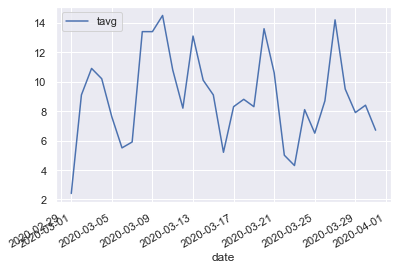

In [24]:
fig = plt.figure(figsize=(10,8))
df_final.plot.line('date','tavg')

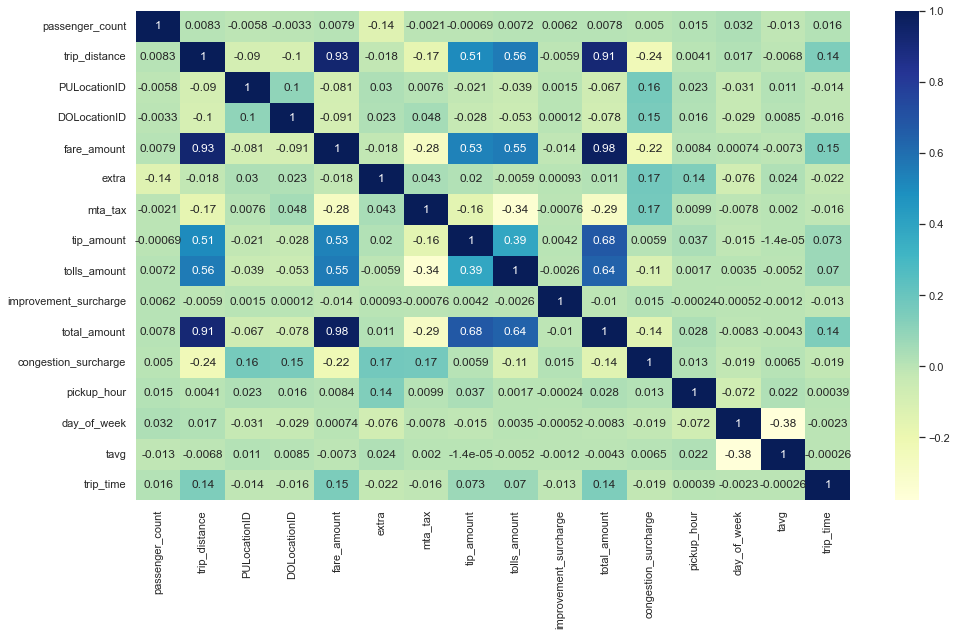

In [25]:
### Finding correlation among the variables 
num_cols = ['passenger_count','trip_distance','PULocationID','DOLocationID','fare_amount','extra','mta_tax','tip_amount',
           'tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','pickup_hour','day_of_week','tavg',
            'trip_time']
plt.figure(figsize = (16,9))
c1 = df_final[num_cols].corr()
ax = sns.heatmap(c1,cmap="YlGnBu",annot=True)
plt.show()

### Basic linear regression model

In [26]:
pred_cols = ['passenger_count','trip_distance','PULocationID','DOLocationID','tip_amount','tolls_amount','total_amount',
             'pickup_hour','day_of_week','tavg']
tar_col = ['trip_time']


X = df_final[pred_cols]
y =df_final[tar_col]

print(X.shape,y.shape)

(2865071, 10) (2865071, 1)


In [27]:
X.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,pickup_hour,day_of_week,tavg
count,2.865071e+06,2.865071e+06,2.865071e+06,2.865071e+06,2.865071e+06,2.865071e+06,2.865071e+06,2.865071e+06,2.865071e+06,2.865071e+06
mean,1.502471e+00,2.857333e+00,1.638591e+02,1.612875e+02,2.167280e+00,2.871333e-01,1.817053e+01,1.375307e+01,2.852497e+00,9.259619e+00
std,1.114228e+00,3.621730e+00,6.632229e+01,7.049968e+01,2.590817e+00,1.565552e+00,1.323655e+01,5.788176e+00,1.988705e+00,3.263758e+00
min,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.100000e-01,0.000000e+00,0.000000e+00,2.400000e+00
25%,1.000000e+00,1.000000e+00,1.160000e+02,1.070000e+02,0.000000e+00,0.000000e+00,1.116000e+01,1.000000e+01,1.000000e+00,7.600000e+00
50%,1.000000e+00,1.680000e+00,1.620000e+02,1.620000e+02,1.960000e+00,0.000000e+00,1.430000e+01,1.400000e+01,3.000000e+00,9.100000e+00
75%,1.000000e+00,3.000000e+00,2.340000e+02,2.340000e+02,2.860000e+00,0.000000e+00,1.975000e+01,1.800000e+01,4.000000e+00,1.090000e+01
max,6.000000e+00,3.109000e+02,2.650000e+02,2.650000e+02,4.932200e+02,6.010200e+02,1.260300e+03,2.300000e+01,6.000000e+00,1.450000e+01


In [28]:
### Split the data into training and test data (80-20)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [29]:
print(x_train.shape,x_test.shape)

(2292056, 10) (573015, 10)


In [30]:
### Normaizing the variables 
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.fit_transform(y_test)

In [31]:
type(y_train)

numpy.ndarray

In [32]:
print(x_train)

[[0.         0.03438515 0.98863636 ... 0.17391304 1.         0.        ]
 [0.         0.04406703 0.86742424 ... 0.82608696 0.83333333 0.63636364]
 [0.         0.00411721 0.88257576 ... 0.69565217 0.         0.90909091]
 ...
 [0.         0.00421371 0.89772727 ... 0.30434783 0.5        0.47933884]
 [0.         0.00887774 0.53787879 ... 0.7826087  0.66666667 0.88429752]
 [0.         0.01026086 0.99242424 ... 0.30434783 1.         0.90909091]]


In [33]:
### check the scaled data
dfTest = X.copy()
dfTest[pred_cols] = scaler.fit_transform(X[pred_cols])
dfTest.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,tip_amount,tolls_amount,total_amount,pickup_hour,day_of_week,tavg
0,0.0,0.015086,0.329545,0.962121,0.004055,0.0,0.021818,0.0,1.0,0.0
1,0.0,0.003506,0.928030,0.337121,0.003954,0.0,0.009079,0.0,1.0,0.0
2,0.2,0.002766,0.568182,0.897727,0.003568,0.0,0.008135,0.0,1.0,0.0
3,0.0,0.011226,0.424242,0.534091,0.007603,0.0,0.017651,0.0,1.0,0.0
4,0.0,0.045321,0.893939,0.049242,0.017943,0.0,0.041937,0.0,1.0,0.0


In [34]:
###Simple linear regession model
from sklearn.linear_model import LinearRegression

simpleLRmodel = LinearRegression()
simpleLRmodel.fit(x_train,y_train)

LinearRegression()

In [35]:
simpleLRmodel.coef_

array([[ 2.83920079e-03,  2.90803720e-02, -2.56359038e-04,
        -4.94466559e-04, -3.90730635e-01, -6.65494523e-01,
         6.37670410e-01, -5.28713137e-04, -3.12247395e-04,
        -7.01008098e-05]])

In [36]:
import math
from sklearn.metrics import mean_absolute_error,mean_squared_error

prediction = simpleLRmodel.predict(x_test)
mse1 = mean_squared_error(y_test,prediction)
mae = (mean_absolute_error(y_test,prediction))

print(mse1,mae)

0.001758684518488427 0.004907954968282956


### Import the  libraries for deep learning models

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

In [38]:
%load_ext tensorboard

### Multi layer Perceptron

In [39]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

In [40]:
regr = MLPRegressor(random_state=1, max_iter=10).fit(x_train, y_train)

C:\Users\amite\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\amite\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
prediction = regr.predict(x_test)

In [42]:
print(metrics.mean_squared_error(y_test, prediction))

0.0017303097415585715


In [43]:
mlp = Sequential()
mlp.add(Dense(10, input_shape=(10,),activation='relu'))
mlp.add(Dense(30,activation='relu'))
mlp.add(Dense(20,activation='relu'))
mlp.add(Dense(10,activation='relu'))
mlp.add(Dense(1))

In [44]:
# compile the keras model
mlp.compile(loss='mse', optimizer='adam')

In [45]:
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [46]:
log_dir = "logs/MLPmodel/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [47]:
### Split the training data into validation dataset 
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.2)

In [48]:
print(x_train.shape,x_val.shape)

(1833644, 10) (458412, 10)


In [49]:
history1 = mlp.fit(x_train, y_train, epochs=10,batch_size=64,
                           validation_data=(x_val,y_val),
                  callbacks=[tensorboard_callback])

Epoch 1/10
28651/28651 [==============================] - 82s 3ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 2/10
28651/28651 [==============================] - 54s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3/10
28651/28651 [==============================] - 61s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 4/10
28651/28651 [==============================] - 52s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 5/10
28651/28651 [==============================] - 51s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 6/10
28651/28651 [==============================] - 50s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 7/10
28651/28651 [==============================] - 50s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 8/10
28651/28651 [==============================] - 50s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/10
28651/28651 [==============================] - 55s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 10/10
28651/28651 [==============================

In [50]:
%tensorboard --logdir logs/MLPmodel/

### Linear Regression with no hidden layer

In [51]:
model2_nohid = Sequential()
model2_nohid.add(Dense(1))

In [52]:
# compile the keras model
model2_nohid.compile(loss='mse', optimizer='sgd')

In [53]:
log_dir = "logs/LRmodel/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [55]:
# fit the keras model on the dataset
# The training loss indicates how well the model is fitting the training data,
# while the validation loss indicates how well the model fits new data.
history2 = model2_nohid.fit(x_train, y_train, epochs=10,batch_size = 256,
                           validation_data=(x_val, y_val),
                           callbacks=[tensorboard_callback])

Epoch 1/10
7163/7163 [==============================] - 11s 2ms/step - loss: 0.0045 - val_loss: 0.0020
Epoch 2/10
7163/7163 [==============================] - 11s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 3/10
7163/7163 [==============================] - 16s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 4/10
7163/7163 [==============================] - 22s 3ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 5/10
7163/7163 [==============================] - 14s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 6/10
7163/7163 [==============================] - 13s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/10
7163/7163 [==============================] - 16s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/10
7163/7163 [==============================] - 11s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 9/10
7163/7163 [==============================] - 11s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 10/10
7163/7163 [==============================] - 13s 2ms/step - l

In [56]:
model2_nohid.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [57]:
%reload_ext tensorboard

In [58]:
%tensorboard --logdir logs/LRmodel/

### Deep Neural Network with 2 hidden layers

In [59]:
dnn_model = Sequential()
dnn_model.add(Dense(10, input_shape=(10,),activation='relu'))
dnn_model.add(Dense(30,activation='relu'))
dnn_model.add(Dense(20, input_shape=(10,),activation='relu'))
dnn_model.add(Dense(1))

In [60]:
# compile the keras model
dnn_model.compile(loss='mse', optimizer='adam')

In [61]:
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 30)                330       
                                                                 
 dense_8 (Dense)             (None, 20)                620       
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________


In [62]:
log_dir = "logs/MLPmodel/" + datetime.datetime.now().strftime("%Y%m%d")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [63]:
history3 = dnn_model.fit(x_train, y_train, epochs=5,batch_size=128,
                           validation_data=(x_val, y_val),
                           callbacks=[tensorboard_callback])

Epoch 1/5
14326/14326 [==============================] - 30s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 2/5
14326/14326 [==============================] - 25s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 3/5
14326/14326 [==============================] - 25s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 4/5
14326/14326 [==============================] - 25s 2ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 5/5
14326/14326 [==============================] - 25s 2ms/step - loss: 0.0017 - val_loss: 0.0018


In [64]:
%tensorboard --logdir logs/MLPmodel/

Reusing TensorBoard on port 6006 (pid 13472), started 0:10:05 ago. (Use '!kill 13472' to kill it.)

In [65]:
## Loss function is MAE and Optimizer is SGD
dnn_model.compile(loss='mae', optimizer='sgd')

In [67]:
history4 = dnn_model.fit(x_train, y_train, epochs=10,batch_size=256,
                           validation_data=(x_val, y_val),
                           callbacks=[tensorboard_callback])

Epoch 1/10
7163/7163 [==============================] - 19s 3ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 2/10
7163/7163 [==============================] - 19s 3ms/step - loss: 0.0067 - val_loss: 0.0071
Epoch 3/10
7163/7163 [==============================] - 16s 2ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 4/10
7163/7163 [==============================] - 17s 2ms/step - loss: 0.0067 - val_loss: 0.0068
Epoch 5/10
7163/7163 [==============================] - 21s 3ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 6/10
7163/7163 [==============================] - 14s 2ms/step - loss: 0.0067 - val_loss: 0.0074
Epoch 7/10
7163/7163 [==============================] - 22s 3ms/step - loss: 0.0067 - val_loss: 0.0061
Epoch 8/10
7163/7163 [==============================] - 25s 4ms/step - loss: 0.0067 - val_loss: 0.0077
Epoch 9/10
7163/7163 [==============================] - 17s 2ms/step - loss: 0.0067 - val_loss: 0.0054
Epoch 10/10
7163/7163 [==============================] - 15s 2ms/step - l

###  Predicting using Linear Regression with no hidden layers model 

In [68]:
final_predictions = model2_nohid.predict(x_test)

17907/17907 [==============================] - 19s 1ms/step


In [69]:
mse2 = mean_squared_error(y_test,final_predictions)
print(mse2)

0.0019393516306308869


In [70]:
print (f"Simple LR model MSE {mse1}")
print(f"Sequential model with no hidden layer MSE {mse2}")

Simple LR model MSE 0.001758684518488427
Sequential model with no hidden layer MSE 0.0019393516306308869


###  Predicting using DNN with 2 hidden layers model 

In [71]:
#### Predictions with DNN model 
prediction_dnn = dnn_model.predict(x_test)

17907/17907 [==============================] - 22s 1ms/step


In [72]:
mse3 = mean_squared_error(y_test,prediction_dnn)
print(f"DNN with 2 hidden layers MSE {mse3}")

DNN with 2 hidden layers MSE 0.0017458311661766714


## Best model is DNN with 2 hidden layers on the basis of MSE